In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [2]:
# Importing the dataset
dataFile = "Mall_Customers.csv"
raw_data = pd.read_csv(dataFile)
df = pd.DataFrame(raw_data)
df.head() # See the first 5 rows

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.dropna()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
x = df.iloc[:, [3, 4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

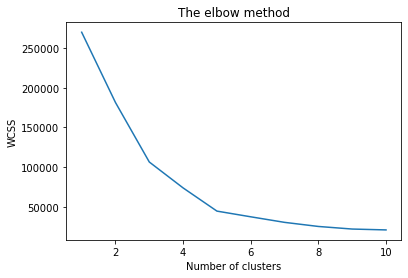

In [5]:
x = df.iloc[:, [3, 4]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
 kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
 kmeans.fit(x)
 wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

C:\Users\admin\anaconda3\envs\dmw5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


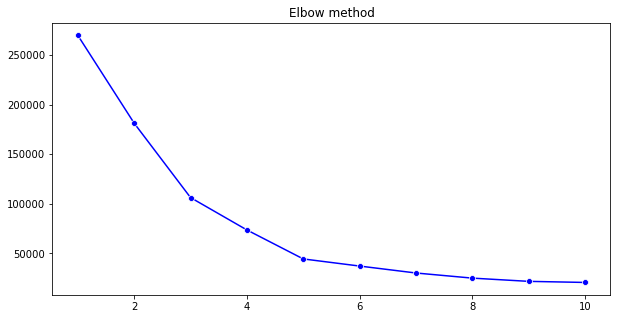

In [6]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11),wcss,marker='o',color='blue')
plt.title('Elbow method')
plt.show()

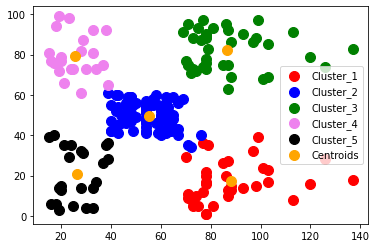

In [7]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 5, init = 'k-means++',
max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
#i above is between 1-10 numbers. 
#init parameter is the random initialization method 
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. 
#Enter the default value of 300
#the next parameter is n_init which is the number of times the 
#K_means algorithm will be run with different initial centroid.

# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster_1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster_2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Cluster_3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],s = 100, c = 'violet', label = 'Cluster_4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1],s = 100, c = 'black', label = 'Cluster_5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, color = 'orange', label = 'Centroids')
plt.legend()

C:\Users\admin\anaconda3\envs\dmw5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

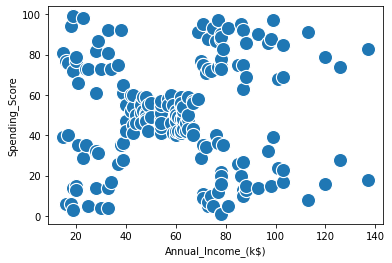

In [9]:
sns.scatterplot('Annual_Income_(k$)','Spending_Score',data=raw_data,s=200)

C:\Users\admin\anaconda3\envs\dmw5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

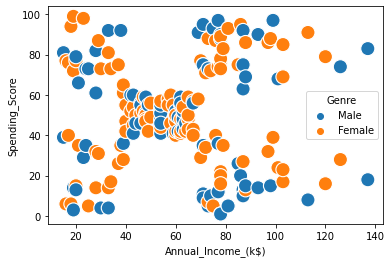

In [10]:
sns.scatterplot('Annual_Income_(k$)','Spending_Score',hue='Genre',data=raw_data,s=200)

In [11]:
# How the customers will be identified and grouped?
print("Question: How the customers will be identified and grouped? ")
print("Answer: Customers will be identified and grouped based on Annual Income & Spending Score ")
df.head() # See the first 5 rows

Question: How the customers will be identified and grouped? 
Answer: Customers will be identified and grouped based on Annual Income & Spending Score 


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# Which attributes is contributing the most to identify the group of customers?
print("Question: Which attributes is contributing the most to identify the group of customers? ")
print("Answer: Spending Score is contributing the most to identify the group of customers ")
df.corr()

Question: Which attributes is contributing the most to identify the group of customers? 
Answer: Spending Score is contributing the most to identify the group of customers 


,CustomerID,Age,Annual_Income_(k$),Spending_Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_Income_(k$),0.977548,-0.012398,1.000000,0.009903
Spending_Score,0.013835,-0.327227,0.009903,1.000000


Question: How many such groups can be created? 
Answer: Total 5 Groups can be created as shown in the plot (Here we can see elbow is created in elbow method at 5 so it is further used as cluster in kmeans algorithm)


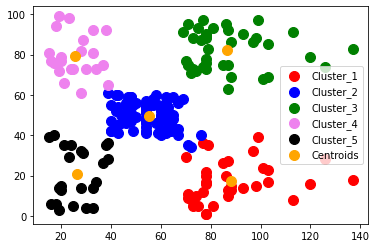

In [13]:
# How many such groups can be created?
print("Question: How many such groups can be created? ")
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster_1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster_2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Cluster_3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1],s = 100, c = 'violet', label = 'Cluster_4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1],s = 100, c = 'black', label = 'Cluster_5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, color = 'orange', label = 'Centroids')
plt.legend()
print("Answer: Total 5 Groups can be created as shown in the plot (Here we can see elbow is created in elbow method at 5 so it is further used as cluster in kmeans algorithm)")